In [1]:
%matplotlib widget
import torch
import numpy as np
import matplotlib.pyplot
import torchvision.transforms as T
import torchvision.transforms.functional as F
import glob
import os
import PIL 
from PIL import Image
%load_ext autoreload
%autoreload 2

In [2]:
# import model
from model import Model_Composite_PL, Model_Composite


In [3]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [4]:
Model = Model_Composite(LUT=True,LUTdim=16,curve=False)

7
10
False
lutdim: 16
7


In [4]:
Model = Model_Composite_PL(dim=32,scaling=True)

8
PLdim: 32


In [6]:
# Loading model
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220712_a10g_2_unetD_7_no_skip_resnet_maskinput_pl32_l1ratio04_NewData_batch_size_8_lr_1e-5_iharmony_compositegan_D_7_ratio_1_noskip_PL32_reconratio_0.4_device_3/checkpoints/ckpt16.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220713_a10g_6_unetD_7_no_skip_resnet_maskinput_pl32_l1ratio06_LR_pairaug_pure_batch_size_8_lr_1e-5_iharmony_compositegan_D_7_ratio_1_noskip_PL32_reconratio_0.6_device_2/checkpoints/ckpt40.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220716_a106_6_unetD_7_no_skip_resnet_maskinput_pl32_l1ratio06_LR_pairaug_pure_LUT_batch_size_8_lr_1e-5_iharmony_compositegan_D_7_ratio_1_noskip_PL32_reconratio_0.6_device_1/checkpoints/ckpt20.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220713_a10g_1_unetD_7_no_skip_resnet_maskinput_pl32_l1ratio0_LR_pairaug_nol1_batch_size_8_lr_1e-5_iharmony_compositegan_D_7_ratio_1_noskip_PL32_reconratio_0_device_2/checkpoints/ckpt30.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220718_a10g_1_unetD_7_no_skip_resnet_maskinput_pl32_noL1_gan_loss_mask_lowdim_batch_size_8_lr_1e-5_iharmony_compositegan_D_3_ratio_1_noskip_PL32_reconratio_0_device_0/checkpoints/ckpt12.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220719_a10g_0_unetD_7_with_skip_resnet_maskinput_pl32_noL1_gan_loss_mask_lowdim_batch_size_12_lr_1e-5_iharmony_compositegan_D_3_ratio_1_noskip_PL32_reconratio_0_device_0/checkpoints/ckpt4.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220719_a10g_0_unetD_7_with_skip_resnet_maskinput_pl32_noL1_gan_loss_mask_lowdim_batch_size_12_lr_1e-5_iharmony_compositegan_D_3_ratio_1_noskip_PL32_reconratio_0_device_0/checkpoints/ckpt16.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220719_a100_1_unetD_7_with_skip_resnet_maskinput_pl32_l1025_gan_loss_mask_lowdim_batch_size_12_lr_1e-5_iharmony_compositegan_D_3_ratio_1_noskip_PL32_reconratio_0.25_device_1/checkpoints/ckpt20.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220719_a100_4_unetD_3_no_skip_resnet_maskinput_pl32_l10_gan_loss_mask_lowdim_batch_size_12_lr_1e-5_iharmony_compositegan_D_3_ratio_1_noskip_PL32_reconratio_0_device_4/checkpoints/ckpt16.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220719_a100_2_unetD_7_with_skip_resnet_maskinput_pl32_l105_gan_loss_mask_lowdim_batch_size_12_lr_1e-5_iharmony_compositegan_D_3_ratio_1_noskip_PL32_reconratio_0.5_device_2/checkpoints/ckpt22.pth"


checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220727_a100_0_unetD_3_with_skip_resnet_maskinput_pl32_gan_loss_mask_lowdim_L105_reconwithgan_augweight_batch_size_8_lr_1e-5_iharmony_compositegan_D_3_ratio_1_noskip_PL32_reconratio_0.5_reconweight_0_device_0/checkpoints/ckpt13.pth"


device="cuda:0"
checkpoint = torch.load(checkpoint_directory, map_location=device)
Model.load_state_dict(checkpoint["state_dict"])
device="cuda:3"
checkpoint = torch.load(checkpoint_directory, map_location=device)
Model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [7]:
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Model.to(device)
Model.eval()

Model_Composite_PL(
  (PL): ResNet(
    (conv1): Conv2d(8, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [8]:
transforms_mask = T.Compose([T.Grayscale(), T.ToTensor()])
transform = T.Compose([T.ToTensor()])
resize = T.Resize((512,512))

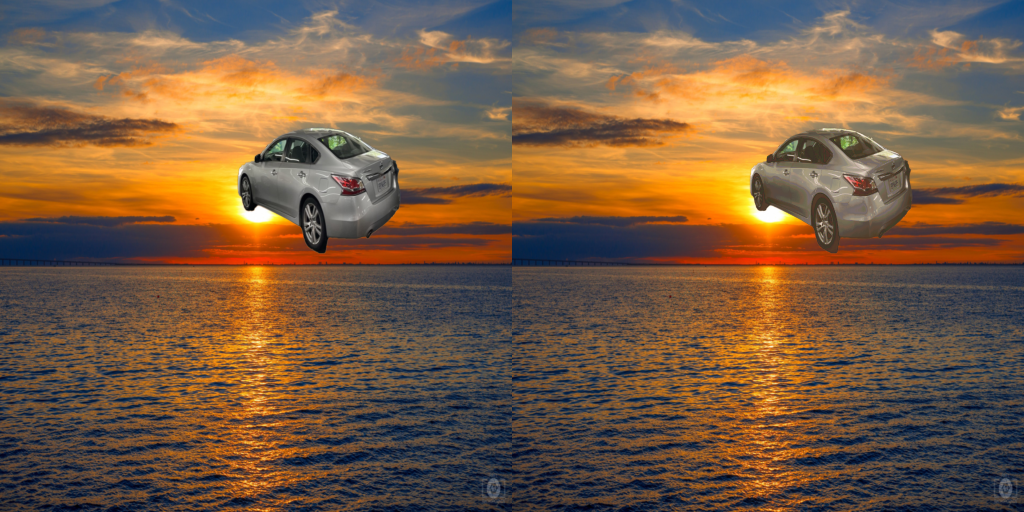

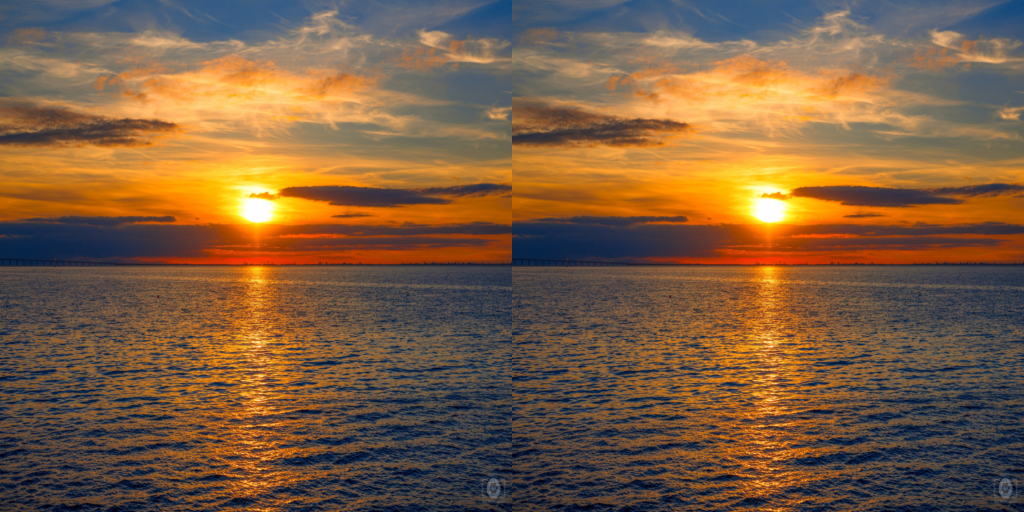

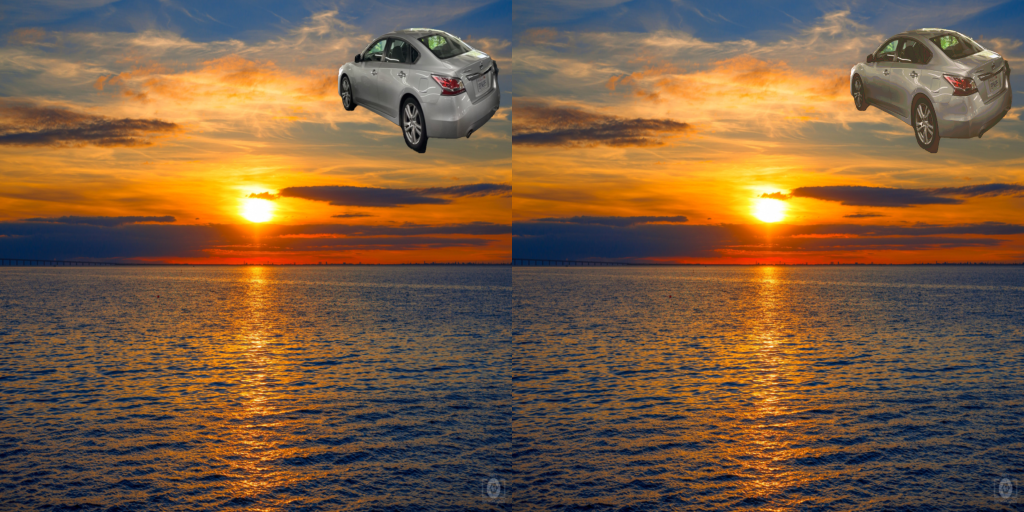

In [14]:
# Loading data
image_bg = resize(Image.open("Demo_hr/IMG_hr_07_bg.jpg"))
image_composite = resize(Image.open("Demo_hr/IMG_hr_07_composite.jpg"))
image_mask = resize(Image.open("Demo_hr/IMG_hr_07_mask.jpg"))






scale = 1
translates = [[-100,100],[200,-200],[0,0]]
for translate in translates:
    torch_bg = transform(image_bg).to(device)
    torch_composite = transform(image_composite).to(device)
    torch_mask = transforms_mask(image_mask).to(device)
    
    torch_composite = F.affine(
        torch_composite, angle=0, translate=[0, 0], scale=scale, shear=0
    )
    torch_mask = F.affine(
        torch_mask, angle=0, translate=[0, 0], scale=scale, shear=0
    )


    torch_composite = F.affine(
        torch_composite, angle=0, translate=translate, scale=1, shear=0
    )
    torch_mask = F.affine(
        torch_mask, angle=0, translate=translate, scale=1, shear=0
    )

    torch_composite = torch_composite*torch_mask +(1-torch_mask)*torch_bg

    Model.setscalor(0.8)
    with torch.no_grad():
        inter_composite, output_composite, par1, par2 = Model(
                        torch_bg[None,...], torch_composite[None,...], torch_mask[None,...]                )
        
    output_lr = T.ToPILImage()(output_composite[0,...])
    composite_lr = T.ToPILImage()(torch_composite)


    image = get_concat_h(composite_lr,output_lr)
    display(image)

